In [ ]:
!pip install git+https://github.com/DistrictDataLabs/yellowbrick.git@develop

  Cloning https://github.com/DistrictDataLabs/yellowbrick.git (to revision develop) to /tmp/pip-req-build-ovn2ynf0
  Running command git clone -q https://github.com/DistrictDataLabs/yellowbrick.git /tmp/pip-req-build-ovn2ynf0
  Created wheel for yellowbrick: filename=yellowbrick-1.2-cp36-none-any.whl size=270245 sha256=c6ea865e14140b0780b9cd6614352c5dfed42136689e41dbd3919aa17408e59a
  Stored in directory: /tmp/pip-ephem-wheel-cache-tczdti36/wheels/19/7c/6e/b270407cdf07adc6080f597d76240341462cc12ed477693370
Successfully built yellowbrick


In [ ]:
import nltk
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from yellowbrick.text import TSNEVisualizer
from yellowbrick.text import UMAPVisualizer
from yellowbrick.text import PosTagVisualizer
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')

from nltk.corpus import stopwords
eng_stopwords = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

!ls "/content/drive/My Drive/author_files"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
CountVectorizer_DF.csv	test_unique.xlsx   train_unique.xlsx
df_features.pkl		test.xlsx	   train.xlsx
test_common.xlsx	train_common.xlsx  X_train.csv


In [ ]:
train_df = pd.read_excel('/content/drive/My Drive/author_files/train.xlsx')
test_df = pd.read_excel('/content/drive/My Drive/author_files/test.xlsx')

In [ ]:
train_df

,id,text,author
0,24781,That is the most unbecoming thing there is,WO
1,20561,I call them forth to credit her,SW
2,62359,"She sat up and said as she had determined, ""My...",WV
3,28093,] But your career will have to be entirely dom...,WO
4,9022,Kent banish'd thus? and France in choler parte...,SW
...,...,...,...
36313,18837,"I'll make a shaft or a bolt on 't; 'slid, 'tis...",SW
36314,39617,""" Dorian Gray shook his head",WO
36315,9074,"My cue is villainous melancholy, with a sigh ...",SW
36316,5580,Enter Fortinbras with his Army over the stage,SW


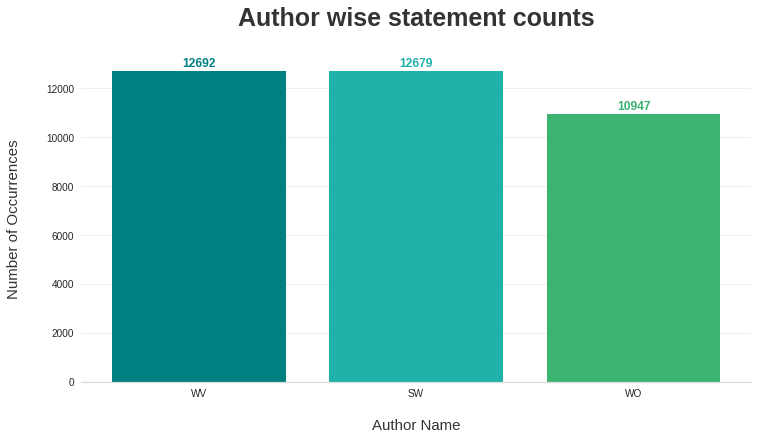

In [ ]:
author_value_counts = train_df['author'].value_counts()

fig, ax = plt.subplots(figsize=(12,6))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

bars = ax.bar(author_value_counts.index, height=author_value_counts.values, color=['teal', 'lightseagreen', 'mediumseagreen'])

for bar in bars:
    bar_color = bar.get_facecolor()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 200,
        round(bar.get_height(), 1),
        horizontalalignment='center',
        color=bar_color,
        weight='bold'
  )

ax.set_xlabel('Author Name', labelpad=20, color='#333333', size=15)
ax.set_ylabel('Number of Occurrences', labelpad=25, color='#333333', size=15)
ax.set_title('Author wise statement counts', pad=30, color='#333333', weight='bold', size=25)
plt.show()

In [ ]:
## Number of words in the text ##
train_df["num_words"] = train_df["text"].apply(lambda x: len(str(x).split()))
test_df["num_words"] = test_df["text"].apply(lambda x: len(str(x).split()))

## Number of unique words in the text ##
train_df["num_unique_words"] = train_df["text"].apply(lambda x: len(set(str(x).split())))
test_df["num_unique_words"] = test_df["text"].apply(lambda x: len(set(str(x).split())))

## Number of characters in the text ##
train_df["num_chars"] = train_df["text"].apply(lambda x: len(str(x)))
test_df["num_chars"] = test_df["text"].apply(lambda x: len(str(x)))

## Number of stopwords in the text ##
train_df["num_stopwords"] = train_df["text"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))
test_df["num_stopwords"] = test_df["text"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))

## Number of punctuations in the text ##
train_df["num_punctuations"] =train_df['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )
test_df["num_punctuations"] =test_df['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )

## Number of title case words in the text ##
train_df["num_words_upper"] = train_df["text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
test_df["num_words_upper"] = test_df["text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

## Number of title case words in the text ##
train_df["num_words_title"] = train_df["text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
test_df["num_words_title"] = test_df["text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

## Average length of the words in the text ##
train_df["mean_word_len"] = train_df["text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
test_df["mean_word_len"] = test_df["text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


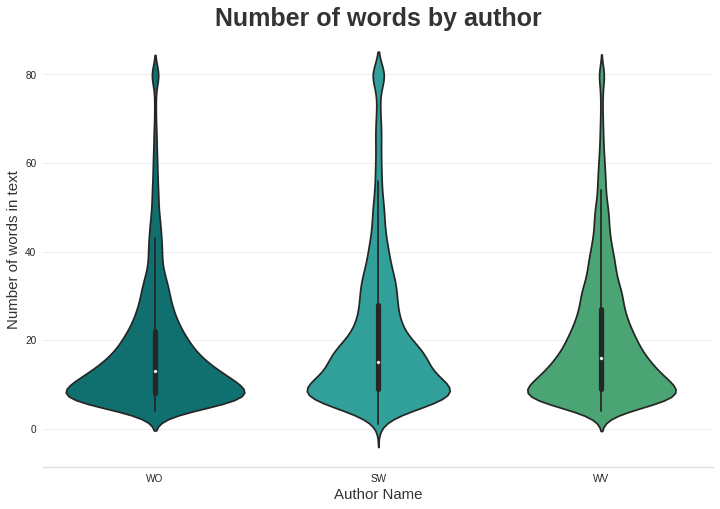

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

train_df['num_words'].loc[train_df['num_words']>80] = 80 #truncation for better visuals
sns.violinplot(x='author', y='num_words', data=train_df, palette=['teal', 'lightseagreen', 'mediumseagreen'])
plt.xlabel('Author Name', color='#333333', fontsize=15)
plt.ylabel('Number of words in text', color='#333333', fontsize=15)
plt.title("Number of words by author", color='#333333', fontsize=25, weight='bold')
plt.show()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


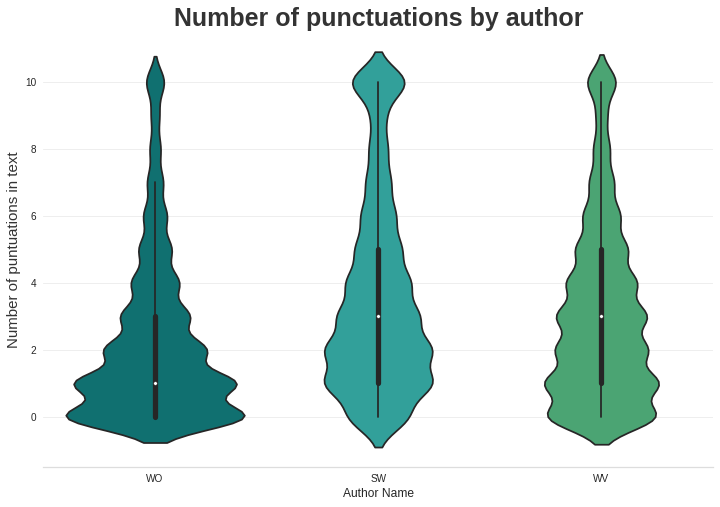

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

train_df['num_punctuations'].loc[train_df['num_punctuations']>10] = 10 #truncation for better visuals
sns.violinplot(x='author', y='num_punctuations', data=train_df, palette=['teal', 'lightseagreen', 'mediumseagreen'])
plt.xlabel('Author Name', fontsize=12)
plt.ylabel('Number of puntuations in text', color='#333333', fontsize=15)
plt.title("Number of punctuations by author", color='#333333', fontsize=25, weight='bold')
plt.show()

In [ ]:
def tsne_plot(values, labels):   
    plt.figure(figsize=(12,12))
    tsne = TSNEVisualizer()
    tsne.fit(values, labels)
    plt.title('TSNE Diagram: Unprocessed Data')
    plt.legend()
    
def umap_plot(values, labels):
    plt.figure(figsize=(12,12))
    umap = UMAPVisualizer()
    umap.fit(values, labels)
    plt.title('UMAP Diagram: Unprocessed Data')
    plt.legend()

def pos_tag_plot(corpus):
    plt.figure(figsize=(12,12))
    viz = PosTagVisualizer(parser='spacy')
    viz.fit(corpus)
    viz.show()

In [ ]:
tokenizer = nltk.RegexpTokenizer(r'[a-zA-Z0-9]+')
sentences = train_df["text"].values
labels = np.array(train_df["author"].values)
tfidf_vectorizer = TfidfVectorizer(lowercase=True,stop_words='english', analyzer="word", max_features=5000, tokenizer = tokenizer.tokenize)     
values = tfidf_vectorizer.fit_transform(sentences)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


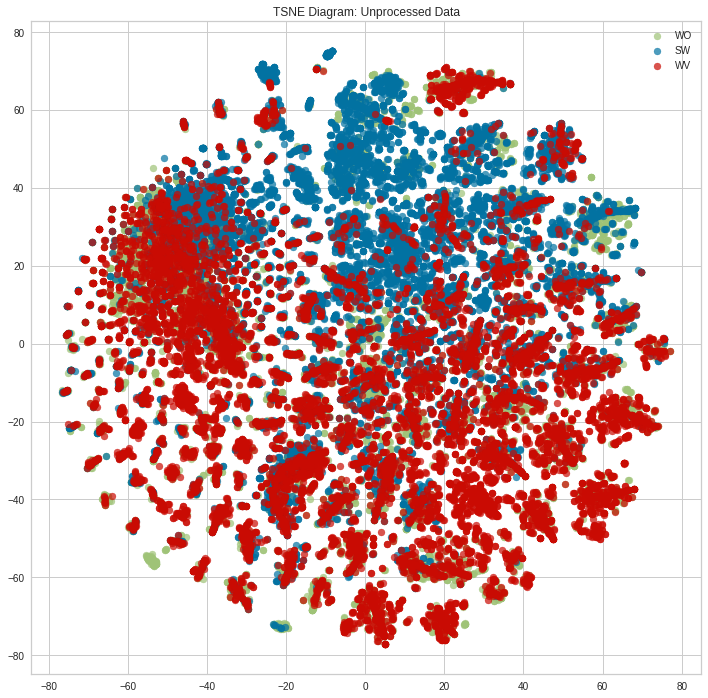

In [ ]:
tsne_plot(values, labels)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


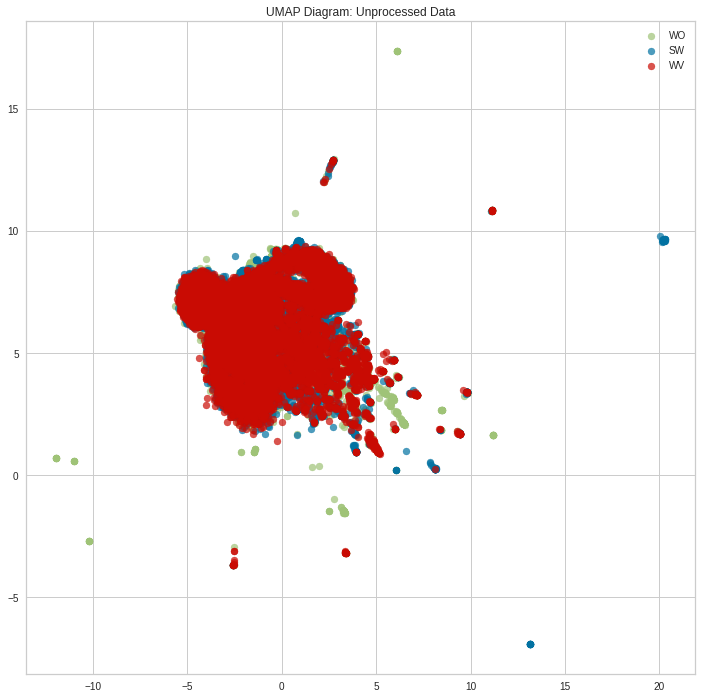

In [ ]:
umap_plot(values, labels)

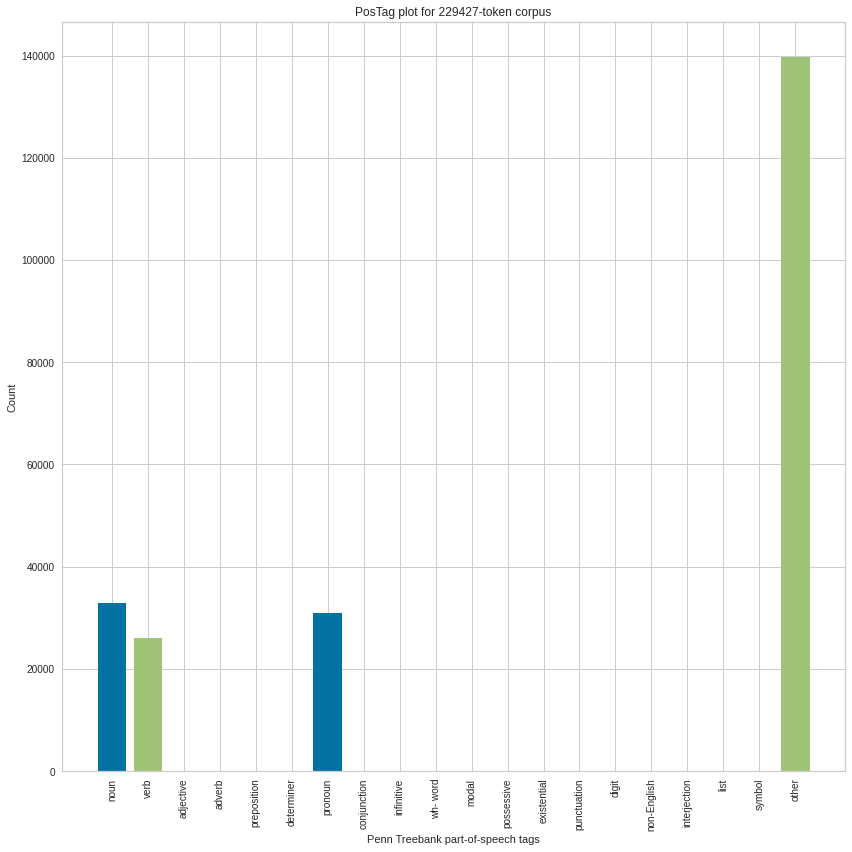

In [ ]:
corpus=""
for sentence in sentences:
    corpus+=sentence+'.\n'
pos_tag_plot(corpus[:1000000])

In [ ]:
X_train = pd.read_csv('/content/drive/My Drive/author_files/X_train.csv')
train = pd.read_csv('/content/drive/My Drive/author_files/CountVectorizer_DF.csv')

In [ ]:
X_train

,vader_negative,vader_neutral,vader_positive,syllables,num_chars,num_terms,average_syllables,num_unique_terms,punctuation_count,stopword_count,average_word_length,word_length_one,word_length_two,word_length_three,word_length_four,word_length_five,word_length_six,word_length_seven,word_length_eight,word_length_nine,word_length_ten,word_length_eleven,word_length_twelve,word_length_thirteen,word_length_fourteen,word_length_fifteen,word_length_sixteen,0,1,2,3,4,5,6,7,8,9,10,11,12,...,6960,6961,6962,6963,6964,6965,6966,6967,6968,6969,6970,6971,6972,6973,6974,6975,6976,6977,6978,6979,6980,6981,6982,6983,6984,6985,6986,6987,6988,6989,6990,6991,6992,6993,6994,6995,6996,6997,6998,6999
0,0.000,1.000,0.000,6,19,3,1.9997,3,0,5,6.333333,0,0,0,16,16,0,0,0,0,16,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000,0.435,0.565,5,16,4,1.2499,4,0,3,4.000000,16,0,0,16,16,16,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.200,0.615,0.185,14,45,11,1.2727,11,2,7,4.090909,16,32,32,48,16,0,16,0,0,16,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000,1.000,0.000,9,25,4,2.2497,4,1,5,6.250000,0,0,16,0,0,16,0,32,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.091,0.815,0.094,41,144,28,1.4643,26,15,10,5.142857,0,16,48,160,0,160,16,32,0,16,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36313,0.000,1.000,0.000,10,32,7,1.4285,7,6,6,4.571429,16,0,0,48,32,0,0,0,16,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36314,0.318,0.682,0.000,6,19,4,1.4999,4,1,1,4.750000,0,0,0,32,16,16,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36315,0.437,0.296,0.267,12,42,8,1.4999,8,2,4,5.250000,0,16,32,32,0,16,0,0,0,32,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36316,0.000,1.000,0.000,7,24,4,1.7498,4,0,4,6.000000,0,0,0,16,32,0,0,0,0,16,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train

,vader_negative,vader_neutral,vader_positive,syllables,num_chars,num_terms,average_syllables,num_unique_terms,punctuation_count,stopword_count,average_word_length,word_length_one,word_length_two,word_length_three,word_length_four,word_length_five,word_length_six,word_length_seven,word_length_eight,word_length_nine,word_length_ten,word_length_eleven,word_length_twelve,word_length_thirteen,word_length_fourteen,word_length_fifteen,word_length_sixteen,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,0.1,1.1,2.1,3.1,4.1,5.1,6.1,7.1,8.1,9.1,10.1,11.1,12.1,13.1,14.1,15.1,16.1,17.1,18.1,19.1
0,0.000,1.000,0.000,6,19,3,1.9997,3,0,5,6.333333,0,0,0,16,16,0,0,0,0,16,0,0,0,0,0,0,0.000707,0.000442,0.023141,-0.566808,0.549840,0.082383,-0.131081,0.032867,0.291781,0.245527,-0.098881,-0.002555,-0.408831,0.052773,-0.199756,-0.195080,-0.122849,0.342964,-0.064780,0.020601,0.620706,-0.225629,-0.210844,-0.259404,-0.123853,-0.101895,0.006527,-0.033000,0.025051,-0.035813,0.007536,-0.030467,0.012579,0.094503,-0.032075,0.066841,0.113300,-0.064844,0.068328,-0.020955
1,0.000,0.435,0.565,5,16,4,1.2499,4,0,3,4.000000,16,0,0,16,16,16,0,0,0,0,0,0,0,0,0,0,0.000367,0.000154,0.010973,-0.241317,0.219419,0.029182,0.059067,-0.004256,0.156555,-0.007885,-0.036370,0.003937,-0.005246,-0.008312,-0.001554,0.108036,-0.038504,0.011194,0.000224,-0.006365,0.428294,0.298966,-0.100712,0.000599,0.563159,-0.136918,-0.072439,-0.061530,-0.016456,-0.196309,0.276506,-0.006948,0.198750,-0.155198,-0.115910,0.032583,0.009668,0.014201,0.056489,0.028148
2,0.200,0.615,0.185,14,45,11,1.2727,11,2,7,4.090909,16,32,32,48,16,0,16,0,0,16,0,0,0,0,0,0,0.001272,0.001088,0.043779,-1.190319,1.264243,0.226966,-0.803084,0.139590,0.300991,-0.028450,-0.072654,-0.150329,-1.361961,0.055456,0.274908,1.537116,-0.265684,1.501772,-0.249010,1.307095,0.227100,0.027201,-0.000658,0.231510,-0.023437,-0.037186,0.169414,0.062530,0.022972,0.115253,0.018969,0.068157,-0.013584,-0.024604,-0.073492,0.031428,-0.061983,-0.003777,0.020258,0.030420
3,0.000,1.000,0.000,9,25,4,2.2497,4,1,5,6.250000,0,0,16,0,0,16,0,32,0,0,0,0,0,0,0,0,0.000265,0.000137,0.010713,-0.327593,0.368712,0.070321,-0.145550,0.037461,-0.013940,0.034405,-0.050125,-0.005974,-0.175899,0.011014,-0.164594,-0.009401,0.099923,0.366599,-0.034715,0.100338,0.185836,-0.097235,-0.099130,-0.000010,0.022680,0.286402,-0.006658,-0.088467,0.019579,-0.053793,-0.005452,-0.071704,0.011655,-0.025626,0.050633,-0.023824,0.250260,0.007660,-0.081891,-0.170033
4,0.091,0.815,0.094,41,144,28,1.4643,26,15,10,5.142857,0,16,48,160,0,160,16,32,0,16,0,0,0,0,0,0,0.017277,0.016906,0.227630,-4.428512,4.171699,0.590431,-1.144605,0.074594,7.302168,0.122156,-1.405450,1.224090,4.981772,-0.312475,-0.748181,-0.640914,-0.922442,-1.097538,-0.004776,0.020220,0.357608,-0.019880,-0.189513,0.181273,-0.099402,0.074957,-0.057862,-0.011200,0.015343,-0.013379,0.029758,0.101171,0.003874,0.054249,-0.025220,0.009352,0.025675,-0.027395,0.023420,-0.117704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36313,0.000,1.000,0.000,10,32,7,1.4285,7,6,6,4.571429,16,0,0,48,32,0,0,0,16,0,0,0,0,0,0,0,0.000424,0.000268,0.015636,-0.419128,0.448206,0.079633,0.091018,0.002790,0.373623,0.031138,-0.083056,-0.025677,-0.428119,0.011255,0.077679,0.304633,-0.025640,0.226277,0.010572,-0.047725,0.366891,0.009625,-0.074274,0.524889,-0.133974,-0.125590,-0.096464,0.100046,-0.090561,-0.104583,0.020800,-0.053895,-0.022339,0.042111,-0.011298,-0.006722,-0.164429,0.073278,0.022949,-0.166795
36314,0.318,0.682,0.000,6,19,4,1.4999,4,1,1,4.750000,0,0,0,32,16,16,0,0,0,0,0,0,0,0,0,0,0.000396,0.000288,0.011973,-0.276164,0.248584,0.032444,-0.376764,0.049643,-0.115641,-0.030327,-0.005019,-0.007927,-0.193329,0.036647,-0.005841,0.121815,0.045984,0.043413,-0.130442,0.662416,0.626143,-0.129217,-0.181433,-0.327470,-0.196225,-0.107816

In [ ]:
label_col='author'
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(train)
tsne_dict = {'tsne-one':tsne_pca_results[:,0], 'tsne-two':tsne_pca_results[:,1], label_col:train_df['author']}
dataframe = pd.DataFrame.from_dict(tsne_dict)
num_unique_labels = dataframe[label_col].unique()
num_classes = len(num_unique_labels)
palette = np.array(sns.color_palette("tab10", num_classes))
plt.figure(figsize=(10, 10))
labels=['WV', 'WS', 'SW']

ValueError: ignored

<Figure size 720x720 with 0 Axes>

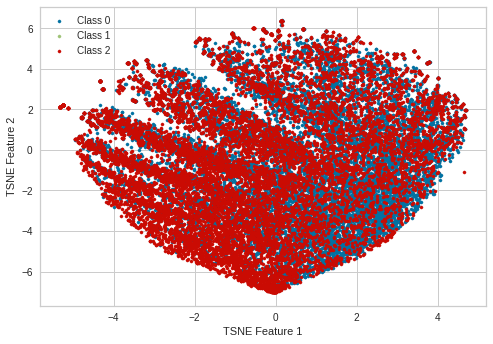

In [ ]:
for i, label in zip(range(len(num_unique_labels)), labels):
    df = dataframe.loc[dataframe[label_col] == label]
    plt.scatter(df['tsne-one'], df['tsne-two'], s=10, marker = "o", label='Class '+str(i))
plt.ylabel('TSNE Feature 2')
plt.xlabel('TSNE Feature 1')
plt.legend()
plt.show()

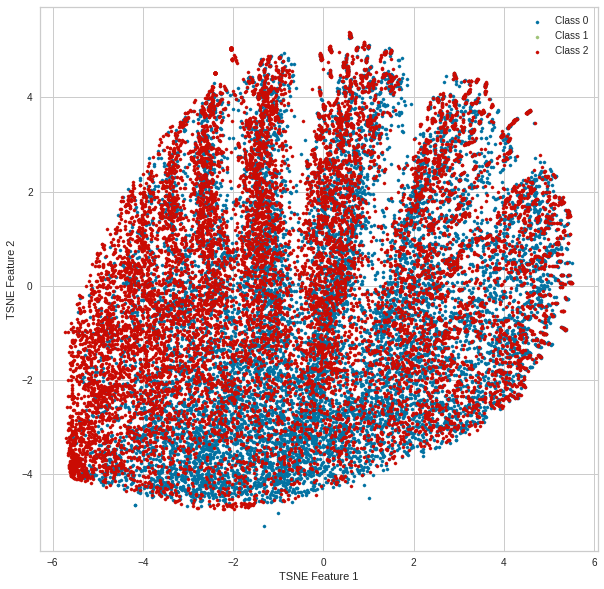

In [20]:
label_col='author'
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(X_train)
tsne_dict = {'tsne-one':tsne_pca_results[:,0], 'tsne-two':tsne_pca_results[:,1], label_col:train_df['author']}
dataframe = pd.DataFrame.from_dict(tsne_dict)
num_unique_labels = dataframe[label_col].unique()
num_classes = len(num_unique_labels)
palette = np.array(sns.color_palette("tab10", num_classes))
plt.figure(figsize=(10, 10))
labels=['WV', 'WS', 'SW']
for i, label in zip(range(len(num_unique_labels)), labels):
    df = dataframe.loc[dataframe[label_col] == label]
    plt.scatter(df['tsne-one'], df['tsne-two'], s=10, marker = "o", label='Class '+str(i))
plt.ylabel('TSNE Feature 2')
plt.xlabel('TSNE Feature 1')
plt.legend()
plt.show()